In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys, os
sys.path.append(os.path.abspath("../"))

In [3]:
%reload_ext autoreload
%autoreload 2

import utils.dataset as dataset
import utils.transforms as transforms

In [4]:
from torchvision.transforms import Compose
from torch.utils.data import Subset, DataLoader

# SVHN Dataset

## Testing the Dataset alone

In [5]:
svhn = dataset.SVHNDataset(
    '../data/SVHN/train_metadata.pkl',
    '../data/SVHN/train/'
)

In [6]:
len(svhn)

33402

In [7]:
i = -1

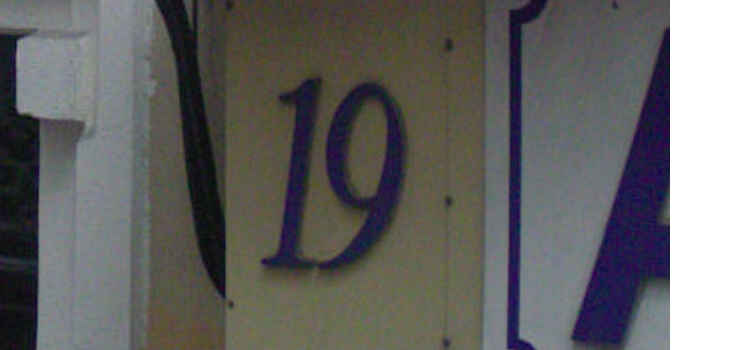

In [8]:
i += 1

svhn[i]['image']

In [9]:
svhn[i]

{'image': <PIL.Image.Image image mode=RGB size=741x350 at 0x120B91198>,
 'metadata': {'height': [219, 219],
  'label': [1, 9],
  'left': [246, 323],
  'top': [77, 81],
  'width': [81, 96]},
 'nb_digits': 2}

## Testing the Transformations

### The initial crop

In [10]:
tranform = Compose([
    transforms.InitialCrop(.5)
])

In [11]:
svhn = dataset.SVHNDataset(
    '../data/SVHN/train_metadata.pkl',
    '../data/SVHN/train/',
    transform=tranform
)

In [12]:
i = -1

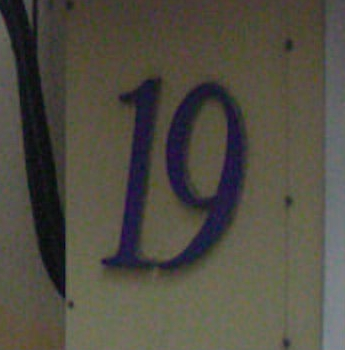

In [13]:
i += 1

svhn[i]['image']

### Rescaling

In [14]:
tranform = Compose([
    transforms.InitialCrop(.2),
    transforms.Rescale(200)
])

In [15]:
svhn = dataset.SVHNDataset(
    '../data/SVHN/train_metadata.pkl',
    '../data/SVHN/train/',
    transform=tranform
)

In [16]:
i = -1

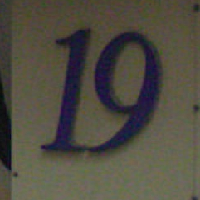

In [17]:
i += 1

svhn[i]['image']

### Random crop

In [325]:
tranform = Compose([
    transforms.InitialCrop(.2),
    transforms.Rescale(280),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [326]:
svhn = dataset.SVHNDataset(
    '../data/SVHN/train_metadata.pkl',
    '../data/SVHN/train/',
    transform=tranform
)

In [327]:
i = -1

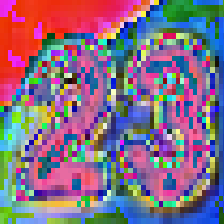

In [329]:
i += 1
svhn[i]['image']

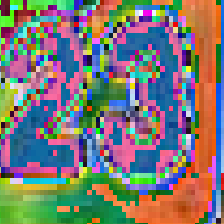

In [323]:
i += 1
svhn[i]['image']

Notice how the cropped region changes.

### Transformation to a tensor

In [21]:
tranform = Compose([
    transforms.InitialCrop(.2),
    transforms.Rescale(200),
    transforms.RandomCrop(150),
    transforms.ToTensor()
])

In [22]:
svhn = dataset.SVHNDataset(
    '../data/SVHN/train_metadata.pkl',
    '../data/SVHN/train/',
    transform=tranform
)

In [23]:
svhn[0]['image']

tensor([[[0.3569, 0.3529, 0.3529,  ..., 0.3490, 0.3490, 0.3608],
         [0.3608, 0.3569, 0.3529,  ..., 0.3412, 0.3451, 0.3569],
         [0.3608, 0.3529, 0.3451,  ..., 0.3412, 0.3490, 0.3569],
         ...,
         [0.4549, 0.4510, 0.4510,  ..., 0.4196, 0.4157, 0.4118],
         [0.4510, 0.4431, 0.4353,  ..., 0.4196, 0.4235, 0.4157],
         [0.4353, 0.4275, 0.4196,  ..., 0.3843, 0.3882, 0.4000]],

        [[0.3098, 0.3020, 0.3020,  ..., 0.3098, 0.3137, 0.3255],
         [0.3059, 0.3059, 0.3059,  ..., 0.3216, 0.3176, 0.3294],
         [0.3059, 0.3020, 0.3059,  ..., 0.3216, 0.3294, 0.3373],
         ...,
         [0.4157, 0.4196, 0.4275,  ..., 0.4353, 0.4275, 0.4235],
         [0.4235, 0.4235, 0.4275,  ..., 0.4392, 0.4431, 0.4431],
         [0.4157, 0.4196, 0.4196,  ..., 0.4431, 0.4471, 0.4431]],

        [[0.2627, 0.2667, 0.2667,  ..., 0.2627, 0.2549, 0.2588],
         [0.2706, 0.2706, 0.2588,  ..., 0.2471, 0.2471, 0.2549],
         [0.2706, 0.2667, 0.2588,  ..., 0.2471, 0.2510, 0.

# Splitting the dataset

In [24]:
tranform = Compose([
    transforms.InitialCrop(.2),
    transforms.Rescale(200),
    transforms.RandomCrop(150),
    # transforms.ToTensor()
])

In [25]:
svhn = dataset.SVHNDataset(
    '../data/SVHN/train_metadata.pkl',
    '../data/SVHN/train/',
    transform=tranform
)

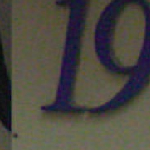

In [26]:
svhn[0]['image']

In [27]:
split = .8

n = len(svhn)
indices = list(range(n))

train_indices = indices[:int(split * n)]
valid_indices = indices[int(split * n):]

In [28]:
train_set = Subset(svhn, train_indices)
valid_set = Subset(svhn, valid_indices)

In [29]:
train_set[1]

{'image': <PIL.Image.Image image mode=RGB size=150x150 at 0x1234C3208>,
 'metadata': {'height': [32, 32],
  'label': [2, 3],
  'left': [-25, -4],
  'top': [-1, -5],
  'width': [23, 26]},
 'nb_digits': 2}

In [32]:
valid_set[0]['image'].size

(150, 150)

# Dataloading

In [33]:
tranform = Compose([
    transforms.InitialCrop(.2),
    transforms.Rescale(200),
    transforms.RandomCrop(150),
    transforms.ToTensor()  # Otherwise the dataloader won't work
])

In [34]:
svhn = dataset.SVHNDataset(
    '../data/SVHN/train_metadata.pkl',
    '../data/SVHN/train/',
    transform=tranform
)

In [35]:
split = .8

n = len(svhn)
indices = list(range(n))

train_indices = indices[:int(split * n)]
valid_indices = indices[int(split * n):]
train_set = Subset(svhn, train_indices)
valid_set = Subset(svhn, valid_indices)

In [36]:
dataloader = DataLoader(
    dataset=train_set, 
    shuffle=True, 
    batch_size=10
)

print('>> Total batch number: {}'.format(len(dataloader)))

>> Total batch number: 2673


In [41]:
for batch, sample in enumerate(dataloader):
    print(sample['nb_digits'])
    print(sample['image'].type)
    break

tensor([2, 3, 4, 2, 2, 2, 2, 3, 3, 3])
<built-in method type of Tensor object at 0x12248fa68>


Notice that the samples are shuffled: the number of digits is different every time we run the cell.